In [2]:
%matplotlib inline
from graph import *
from kernel import *
from svm import SVM
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db = Database()
d = []
db2 = db.gen_database_test(9, 5, 5, 3)
N = np.max(db2[:,0].shape[0])
M = np.max([len(x.nonzero()[0]) for x in db2[:,0]])
ker = Kernel(0.9,N,M)


962 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


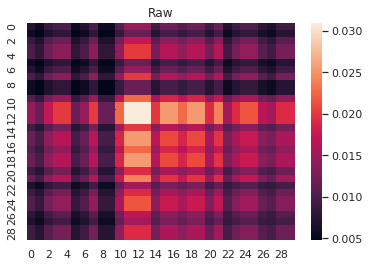

In [9]:
%%timeit
plt.clf()
plt.title("Raw")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.raw_kernel))

764 ms ± 277 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


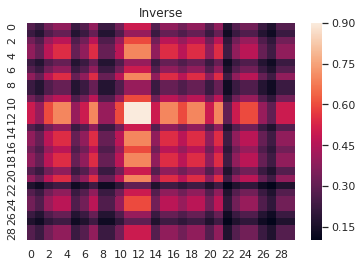

In [10]:
%%timeit
plt.clf()
plt.title("Inverse")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.inv_kernel))

1.05 s ± 470 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


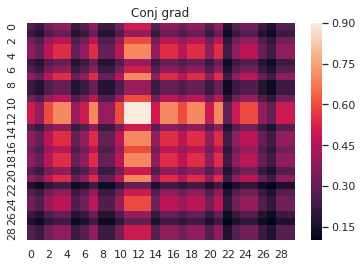

In [11]:
%%timeit
plt.clf()
plt.title("Conj grad")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.conj_grad_kernel))

1.5 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


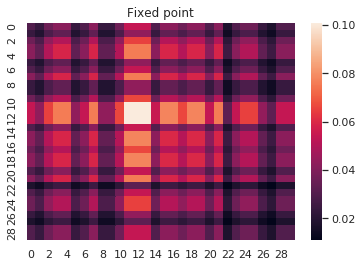

In [12]:
%%timeit
plt.clf()
plt.title("Fixed point")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.fixed_point_kernel))

1.66 s ± 431 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


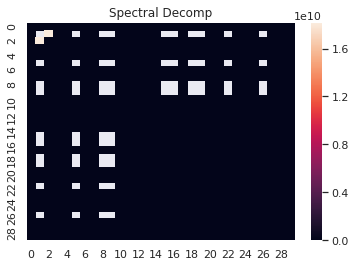

In [13]:
%%timeit
plt.clf()
plt.title("Spectral Decomp")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.spec_decomp_kernel))

In [2]:
%%time
db = Database()
d = []
N = 30
for _ in range(N):
    db2 = db.gen_database_test(9, 5, 5, 3)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
    d.append(s.cross_val_score(5))
print("Mean acc = ",sum([x["accuracy"] for x in d])/N)
print("Mean time = ",sum([x["time"] for x in d])/N)
print("Mean std = ",sum([x["stddev"] for x in d])/N)
#rajouter labels
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

Mean acc =  0.49999999999999994
Mean time =  0.46909941037495934
Mean std =  0.16049890296262528
CPU times: user 25.4 s, sys: 29.2 s, total: 54.7 s
Wall time: 14.6 s
